In [63]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
# from hopf_helper import calc_and_plot_hopf_maruyama, set_axes_title
# import hopf_helper as hh


In [64]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from ews_analysis import hopf_helper as hh


In [65]:
"""
r_dot = mu*r - r^3
theta_dot = omega + b*r^2
mu_dot = epsilon
"""

r_0 = 0.1
omega = 2
b = 1
theta_0 = 0
mu_0 = -2.0
epsilon = 0.01
sigma = 0.9 # noise
t_span, t_points= 410, 50000 
time = np.linspace(0, t_span, t_points)
dt = t_span/t_points
ews_win_size = t_points // 20
ews_offset = ews_win_size // 3

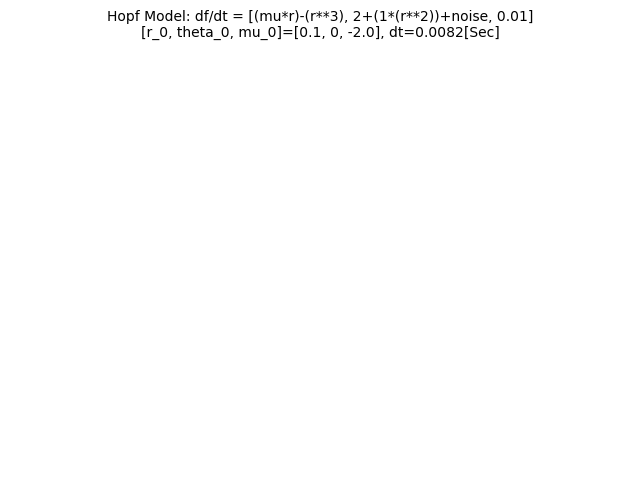

In [66]:
# Plot Hopf sim solutions
# fig = plt.figure(figsize=(16, 8))
fig = plt.figure()
ttl = f"""Hopf Model: df/dt = [(mu*r)-(r**3), {omega}+({b}*(r**2))+noise, {epsilon}]
[r_0, theta_0, mu_0]=[{r_0}, {theta_0}, {mu_0}], dt={dt}[Sec]"""
fig.suptitle(ttl, fontsize=10)
spec = fig.add_gridspec(3, 2)

In [67]:
# Hopf with noise
ax00 = fig.add_subplot(spec[0, :])

# returns (t_star, ax, results, derivatives)
noisy_hopf = hh.calc_and_plot_hopf_maruyama(
    ax00, time, r_0, omega, theta_0, mu_0, epsilon, noise=sigma, b=b,
    label=None, color='b'
)
t_star = noisy_hopf[0]
hh.set_axes_title(ax00, f'Hopf With noise (={sigma})', fontsize=4)

In [68]:
type(noisy_hopf[2])
noisy_hopf[2].shape



(50000, 3)

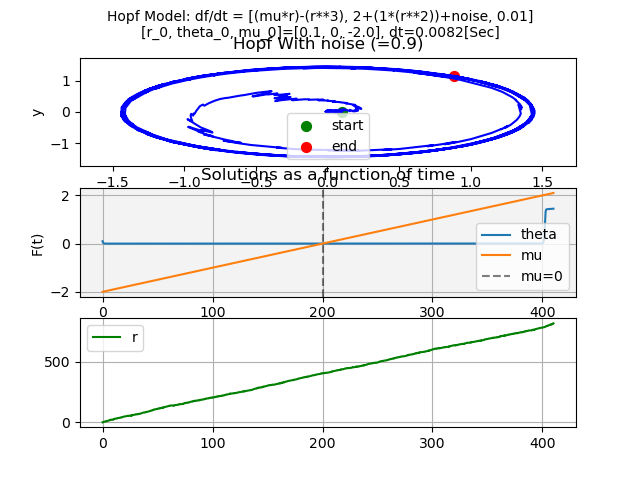

In [69]:
ax1 = fig.add_subplot(spec[1, :])
hh.set_axes_title(ax1, 'Solutions as a function of time', fontsize=6)
ax1.set_facecolor(plt.cm.gray(.95))
ax1.set_ylabel('F(t)')

for i in [0,2]:
    ax1.plot(time, noisy_hopf[2][:,i], label='theta' if i==0 else 'mu')
ax1.axvline(noisy_hopf[0], color='k', linestyle='--', alpha=0.5, label='mu=0')
# ax1.plot(time, noisy_hopf[2][:,1], label='r')

ax2 = fig.add_subplot(spec[2, :], sharex=ax1)
ax2.plot(time, noisy_hopf[2][:,1], label='r', color='g')

for ax in [ax1, ax2]:
    ax.legend()
    ax.grid()    


plt.show()

In [70]:
# fig = plt.figure()
# fig.suptitle('EWS Of Radius With Noise (Hopf)', fontsize=10)
# spec = fig.add_gridspec(3, 2)
# axs = [fig.add_subplot(spec[i, :]) for i in range(3)]
# With noise

# for d in [40, 20, 10, 8, 5]:
#     fig = plt.figure()
#     fig.suptitle(f'EWS Of Radius With Noise (Hopf) ews_win_size={ews_win_size * dt:.2f}[S]', fontsize=10)
#     spec = fig.add_gridspec(3, 2)
#     axs = [fig.add_subplot(spec[i, :]) for i in range(3)]
#     ews_win_size = t_points // d 
#     for q in [5, 10, 25, 50]:
#         ews_offset = ews_win_size // q
#         fig, axs, block_idxs, ar1s, decays, vars = hh.calc_and_plot_ews(
#             fig, axs, time, noisy_hopf[2][:,1], 
#             ews_win_size, ews_offset, 
#             label=f'offset={ews_offset * dt:.2f}[S]'
#         )

In [71]:
d = 13
win_size = d
ws = int(t_points * (d/100)) 
t =(time[2]-time[1]) * ws
print(time[:10], t)
time[np.where(time > 200)[0][0] -3 ]

bif_t = np.where(time > 200)[0][0]
print(f'bif_t: {bif_t}')
pre_idx = bif_t - 300 * win_size
post_idx = bif_t + 300 * win_size
print(f'pre_idx: {pre_idx}, post_idx: {post_idx}')
tmp_time = time[pre_idx:post_idx]
tmp_data = noisy_hopf[2][pre_idx:post_idx,1]
print(noisy_hopf[2][:,1].shape, time.shape)
print(tmp_data.shape, tmp_time.shape)



[0.         0.00820016 0.01640033 0.02460049 0.03280066 0.04100082
 0.04920098 0.05740115 0.06560131 0.07380148] 53.30106602132042
bif_t: 24390
pre_idx: 20490, post_idx: 28290
(50000,) (50000,)
(7800,) (7800,)


In [72]:
np.where(time > 0.05)[0][0]

7

ews_win_size=5, ews_offset=1 

100%|██████████| 5995/5995 [00:00<00:00, 6416.65it/s]


ews_win_size=5, ews_offset=2 

100%|██████████| 2998/2998 [00:00<00:00, 6380.48it/s]


ews_win_size=5, ews_offset=3 

100%|██████████| 1999/1999 [00:00<00:00, 6474.42it/s]


ews_win_size=9, ews_offset=1 

100%|██████████| 10791/10791 [00:01<00:00, 5704.21it/s]


ews_win_size=9, ews_offset=2 

100%|██████████| 5396/5396 [00:00<00:00, 5517.38it/s]


ews_win_size=9, ews_offset=5 

100%|██████████| 2159/2159 [00:00<00:00, 5527.16it/s]


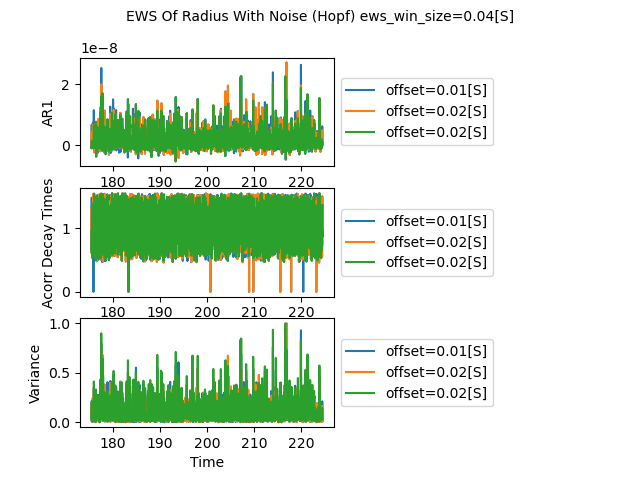

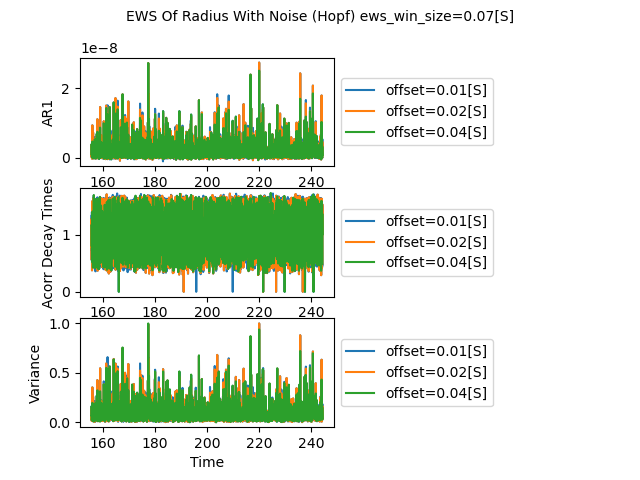

In [85]:
for d in [5, 9]:
    # ews_win_size = int(t_points * (d/100)) 
    ews_win_size = d
    fig = plt.figure()
    fig.suptitle(f'EWS Of Radius With Noise (Hopf) ews_win_size={ews_win_size * dt:.2f}[S]', fontsize=10)
    spec = fig.add_gridspec(3, 2)
    axs = [fig.add_subplot(spec[i, :]) for i in range(3)]
    for q in [10, 50, 70]:
        ews_offset = int(ews_win_size * (q/100)) + 1 
        print(f'ews_win_size={ews_win_size}, ews_offset={ews_offset}', end=' ')
        
        pre_idx = bif_t - 600 * ews_win_size
        post_idx = bif_t + 600 * ews_win_size
        tmp_time = time[pre_idx:post_idx]
        tmp_data = noisy_hopf[2][pre_idx:post_idx, 1]

        fig, axs, block_idxs, ar1s, decays, vars = hh.calc_and_plot_ews(
            fig, axs, tmp_time, tmp_data, 
            ews_win_size, ews_offset, 
            label=f'offset={ews_offset * dt:.2f}[S]'
        )

        # fig, axs, block_idxs, ar1s, decays, vars = hh.calc_and_plot_ews(
        #     fig, axs, time, noisy_hopf[2][:,1], 
        #     ews_win_size, ews_offset, 
        #     label=f'offset={ews_offset * dt:.2f}[S]'
        # )

In [74]:
print(block_idxs[-4:])
print(ews_win_size, ews_offset)
print(block_idxs[-1]+ews_win_size+ews_offset)

start = block_idxs[-1]+ews_offset
stop = block_idxs[-1]+ews_win_size+ews_offset
lag1 = noisy_hopf[2][:,1][start:stop]

start = block_idxs[-1]
stop = block_idxs[-1]+ews_win_size
lag0 = noisy_hopf[2][:,1][start:stop]

print(lag1.shape, lag0.shape)

d, q = 7,5
a = int(t_points * (d/100)) 
b = int(ews_win_size * (q/100))
print(a,b)




[49933 49946 49959 49972]
25 13
50010
(15,) (25,)
3500 1
